# Análise de Dados com a base Iris

## Abrindo base

In [29]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
df = pd.read_csv(url, names=features+['classe'])
df['classe'] = df['classe'].astype('category')
df.head(12)

,sepal_length,sepal_width,petal_length,petal_width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Estatísticas básicas (balanceamento)

<Axes: >

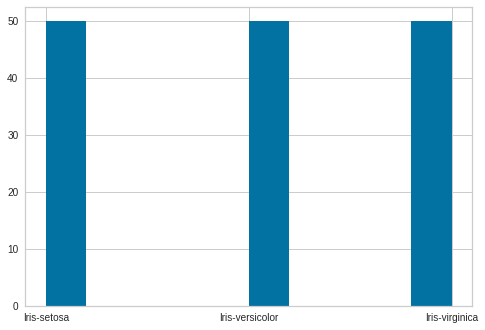

In [31]:
df.classe.hist()

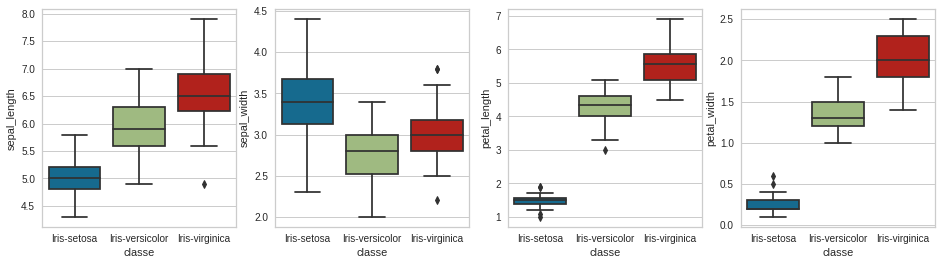

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 4))

fig.add_subplot(1, 4, 1), sns.boxplot( x=df["classe"], y=df["sepal_length"] );
fig.add_subplot(1, 4, 2), sns.boxplot( x=df["classe"], y=df["sepal_width"] );
fig.add_subplot(1, 4, 3), sns.boxplot( x=df["classe"], y=df["petal_length"] );
fig.add_subplot(1, 4, 4), sns.boxplot( x=df["classe"], y=df["petal_width"] );

plt.show()

## Projeção pareada

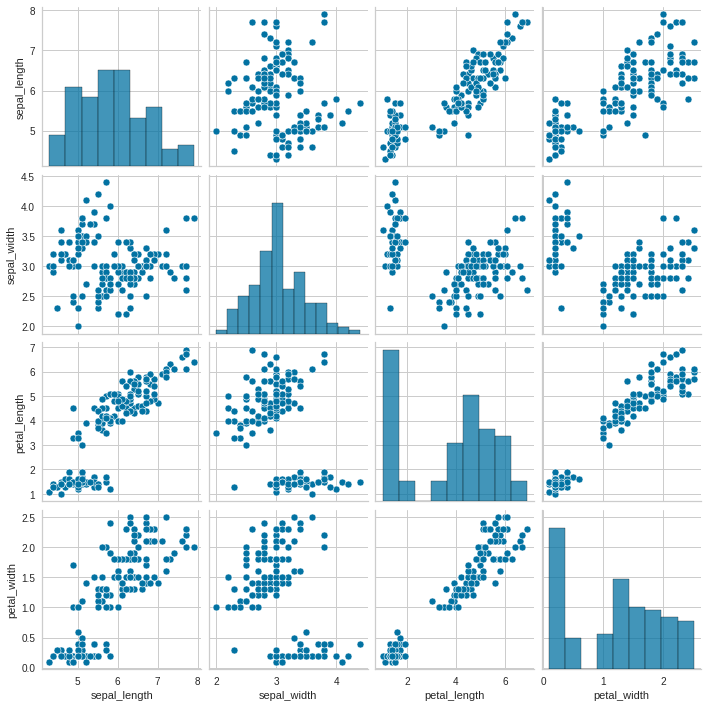

In [33]:
import seaborn as sns

sns.pairplot(df)

## Projeção pareada (com rótulo)

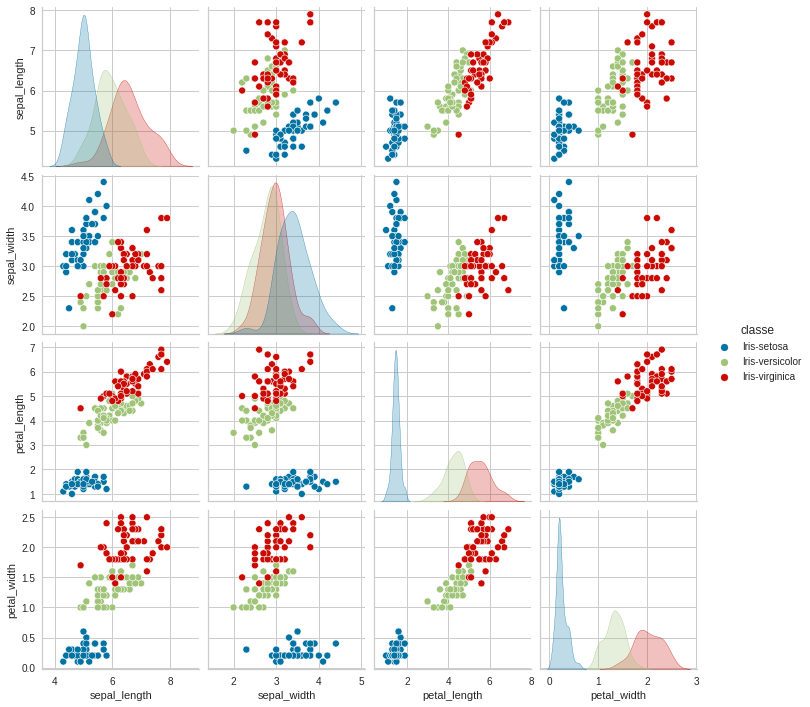

In [34]:
sns.pairplot(df, hue="classe")

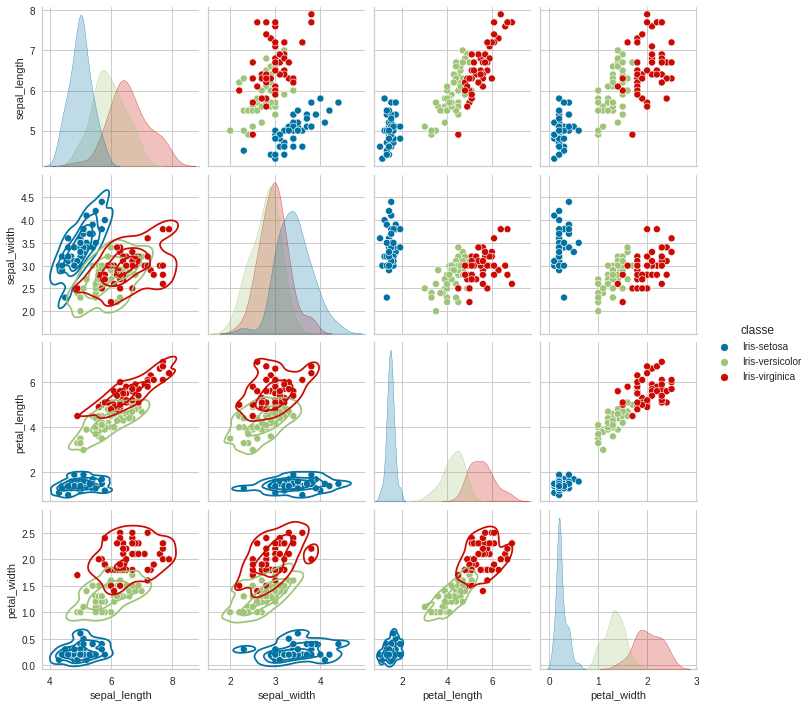

In [35]:
g = sns.pairplot(df, diag_kind="kde", hue="classe")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## Análise de Componentes Principais (PCA)

In [36]:
from sklearn.preprocessing import StandardScaler

x = df.loc[:, features].values
y = df.loc[:,['classe']].values

# scalando as features (mean = 0 and variance = 1)
x = StandardScaler().fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
finalDf = pd.concat([principalDf, df['classe']], axis = 1)
finalDf.head()

,PC 1,PC 2,PC 3,PC 4,classe
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


0.73
0.23
0.04
0.01


<Axes: >

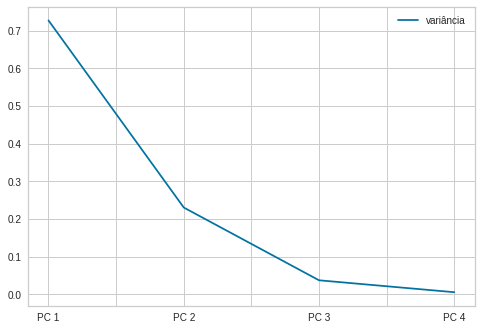

In [38]:
PC1, PC2, PC3, PC4 = pca.explained_variance_ratio_

print(PC1.round(2))
print(PC2.round(2))
print(PC3.round(2))
print(PC4.round(2))
pd.DataFrame({'variância': [PC1, PC2, PC3, PC4]}
             , index=['PC 1', 'PC 2', 'PC 3', 'PC 4']).plot.line()



In [39]:
## Visualização da PCA

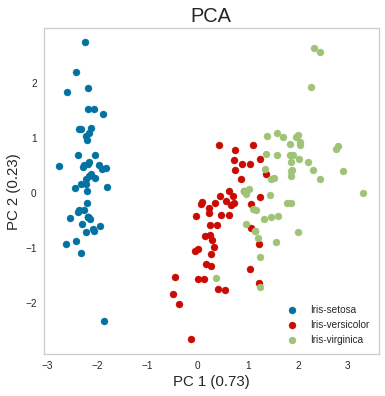

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1 ('+str(round(PC1,2))+ ')', fontsize = 15)
ax.set_ylabel('PC 2 ('+str(round(PC2,2))+ ')', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
colors = ['b', 'r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['classe'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
                
ax.legend(targets)
ax.grid()

## Anaĺise de Componentes Principais (yellowbrick)

In [41]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
pd.factorize(df.classe)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 CategoricalIndex(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False, dtype='category'))

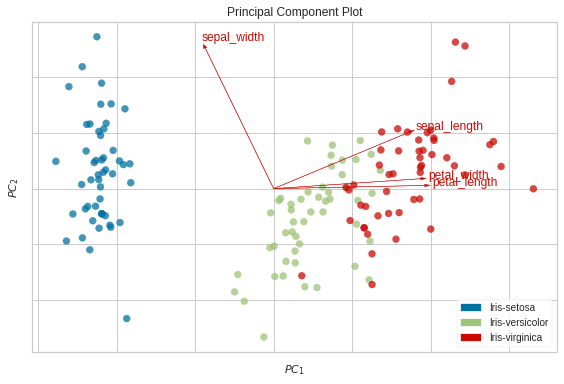

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [43]:
from yellowbrick.features import PCA

X = df.drop(["classe"], axis = 1)
y = pd.factorize(df.classe)[0]

visualizer = PCA(scale=True, proj_features=True, classes=df.classe.unique())
visualizer.fit_transform(X, y)
visualizer.show()

## Correlação das Features (Pearson)

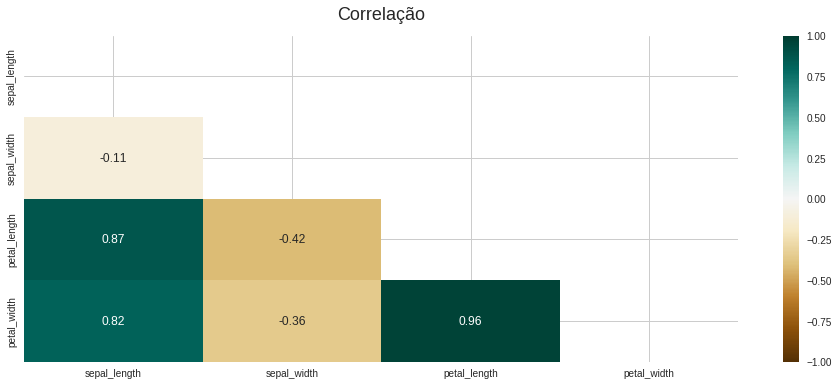

In [44]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

## Correlação das Features (X) com o Target (y) (Pearson)

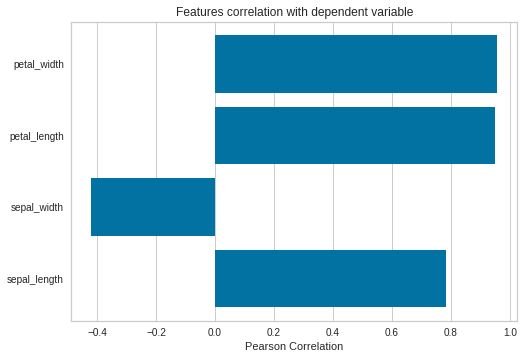

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [45]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

X = df.drop(["classe"], axis = 1)
y = pd.factorize(df.classe)[0]

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()    

## Correlação das Features (X) com o Target (y) (Mutual Information)

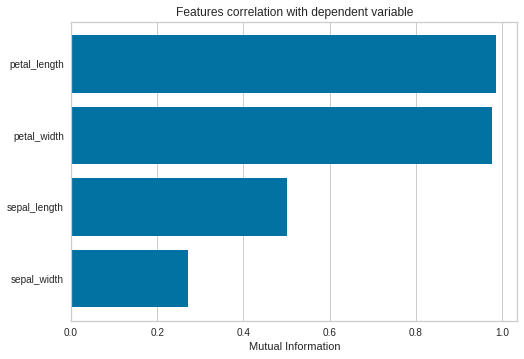

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [46]:
from yellowbrick.target import FeatureCorrelation


# Instaniate the visualizer
visualizer = FeatureCorrelation(
    method='mutual_info-classification', feature_names=features, sort=True
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()              # Finalize and render the figure

# Modelos de Aprendizado de Máquina

## Criação do conjunto de treino e teste

In [71]:
# Dividindo o dataset entre treino e teste (hold-out)

# embaralhando as amostras (random)
np.random.seed(2)
indices = np.random.permutation(len(df))
corte = round(len(df)*0.75)
amostras_treino = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].iloc[indices[:corte]]
rotulos_treino = df['classe'].iloc[indices[:corte]].cat.codes
amostras_teste = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].drop(amostras_treino.index)
rotulos_teste = df['classe'].drop(rotulos_treino.index).cat.codes

# criando uma solução com kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
clr = KNeighborsClassifier()
clr.fit(amostras_treino, rotulos_treino)

clr1 = RandomForestClassifier()
clr1.fit(amostras_treino, rotulos_treino)

resultado = clr.predict(amostras_teste)
resultado1 = clr1.predict(amostras_teste)

print(resultado)
print(rotulos_teste.values)
print(resultado1)

print(resultado.shape)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2
 2]
(38,)


## Avaliação dos Restulados

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print(accuracy_score(rotulos_teste, resultado).round(4))
print(classification_report(rotulos_teste, resultado))
print(confusion_matrix(rotulos_teste, resultado))

0.9211
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.81      0.90        16
           2       0.79      1.00      0.88        11

    accuracy                           0.92        38
   macro avg       0.93      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38

[[11  0  0]
 [ 0 13  3]
 [ 0  0 11]]


## Matrix de Confusão

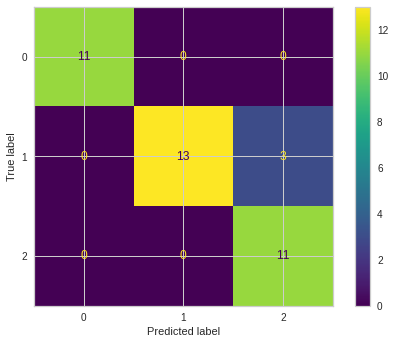

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(rotulos_teste, resultado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()